# 1. Import Packages & Datasets

## 1-1. Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
font_path='C:/Windows/Fonts/NGULIM.TTF'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

In [33]:
yhat = pd.read_csv('emergency_yhat.csv')
cluster_total = pd.read_csv('cluster_df_merged.csv')

In [34]:
yhat.columns=['y_hat_'+str(i) for i in yhat.columns]

In [41]:
basic_info = ['doll_id','cluster23', 'cluster_x23', 'cluster_y23']


ycols=['emergency_month1', 'emergency_month2',
       'emergency_month3', 'emergency_month4', 'emergency_month5',
       'emergency_month6', 'emergency_month7', 'emergency_month8',
       'emergency_month9', 'emergency_month10', 'emergency_month11',
       'emergency_month12','emergency_night', 'emergency_evening',
       'emergency_afternoon', 'emergency_morning', 'emergency_dawn']

In [42]:
y = cluster_total[ycols]

In [43]:
total = pd.concat([cluster_total[basic_info],y,yhat],axis=1)

# 5. Visualization

In [53]:
def draw_heatmap3x3(df,column):
    tmp=pd.DataFrame(df.groupby(['cluster_x23','cluster_y23']).mean()[column])
    tmp2=tmp.reset_index().pivot(columns='cluster_x23',index='cluster_y23',values=column).T
    plt.figure()
    sns.heatmap(tmp2,cmap='Reds')
    title=column[6:]
    plt.title(title,size=15,y=1.03,fontweight="bold")

In [54]:
#y_hat

In [55]:
y_hat_cols=total.columns[total.columns.str.contains('y_hat_')]

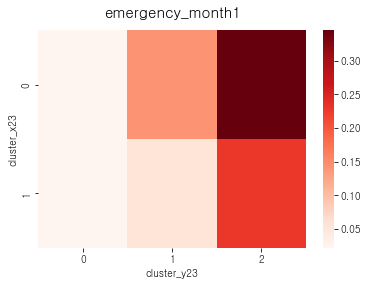

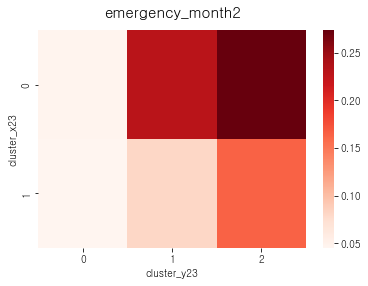

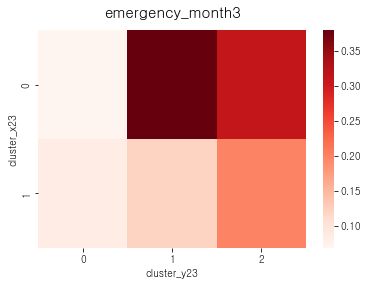

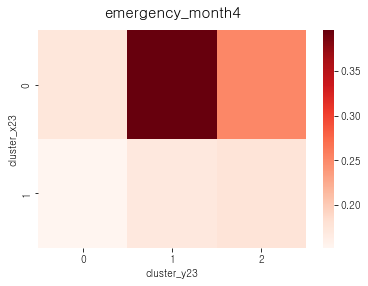

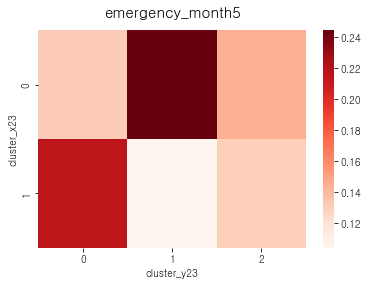

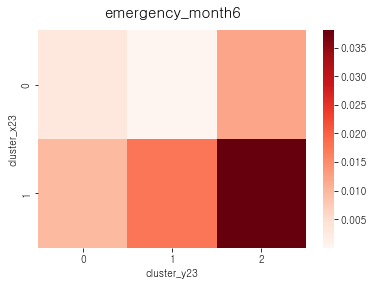

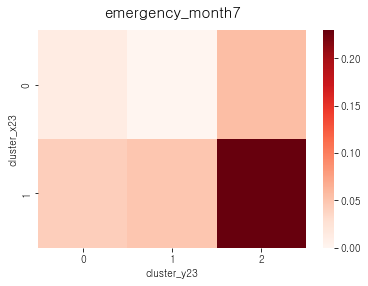

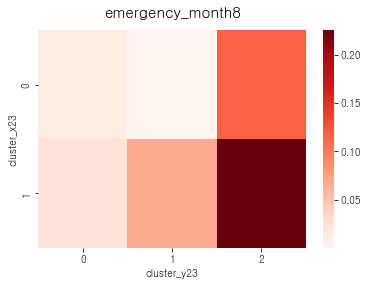

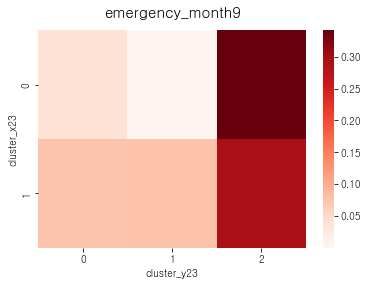

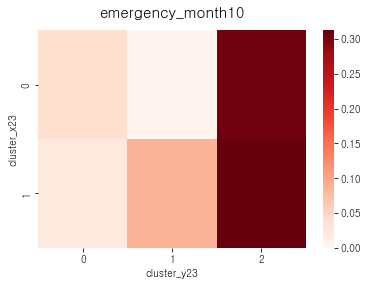

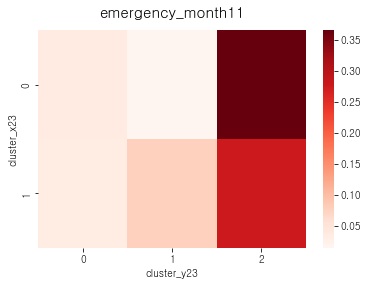

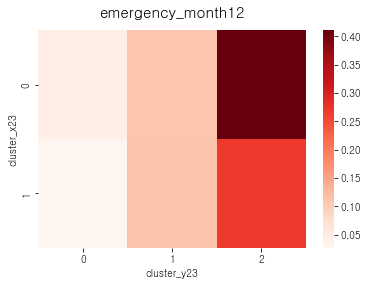

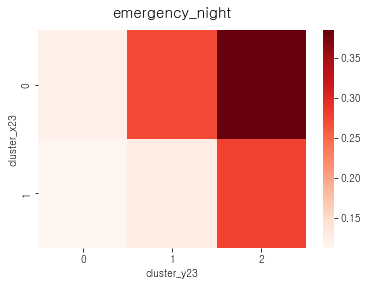

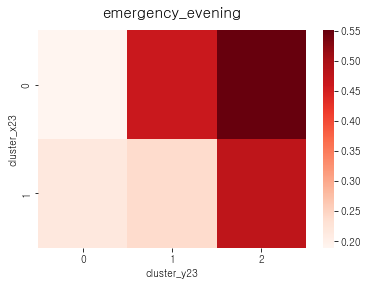

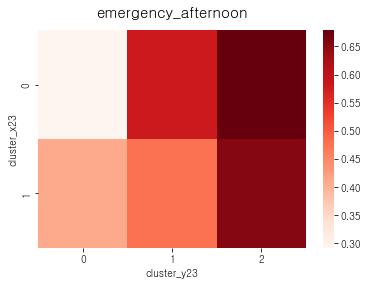

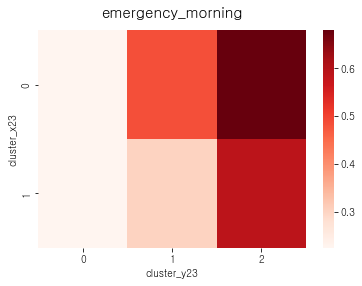

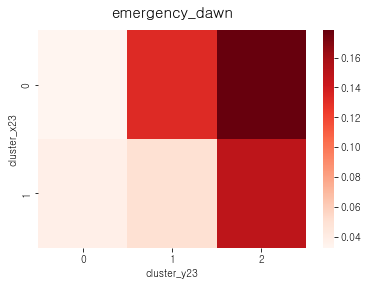

In [56]:
for y_hat in y_hat_cols:
    draw_heatmap3x3(total,y_hat)

In [90]:
total['cluster23']=total['cluster23'].replace({'(0, 0)':'차분한 규칙적 1학년','(0, 1)':'활발한 불규칙적 1학년','(0, 2)':'불규칙적 만능 3학년',
'(1, 0)':'성실한 종교 1학년','(1, 1)':'활발한 성실형 2학년','(1, 2)':'규칙적 만능 3학년'})

In [91]:
col_A=total.columns.str.contains('y_hat')
col_B=total.columns.str.contains('cluster')
total_pred=total[total.columns[col_A|col_B]]

In [92]:
col_C = total.columns.str.contains('y_hat_emergency_month')
#col_D = total.columns.str.contains('y_hat_emergency_hour')
col_E = ['y_hat_emergency_dawn','y_hat_emergency_morning','y_hat_emergency_afternoon',
'y_hat_emergency_evening','y_hat_emergency_night']

In [93]:
TS_month=total_pred.groupby('cluster23')[total.columns[col_C]].mean()
TS_month_std=total_pred.groupby('cluster23')[total.columns[col_C]].std()
TS_month.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
TS_month_std.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
TS_month

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
cluster23,,,,,,,,,,,,
규칙적 만능 3학년,0.229056,0.164645,0.199614,0.176540,0.129716,3.800740e-02,2.295443e-01,2.252074e-01,2.933698e-01,3.123324e-01,0.274774,0.267734
불규칙적 만능 3학년,0.345089,0.273301,0.309045,0.250918,0.144597,1.215753e-02,5.470763e-02,1.174819e-01,3.415319e-01,3.065167e-01,0.365048,0.410251
성실한 종교 1학년,0.022385,0.045331,0.085429,0.151676,0.215997,9.620226e-03,4.276179e-02,2.368818e-02,7.473521e-02,2.276389e-02,0.034522,0.026856
차분한 규칙적 1학년,0.022238,0.047803,0.068692,0.172638,0.131367,3.163595e-03,1.264925e-02,1.271522e-02,3.962962e-02,4.061801e-02,0.035517,0.043363
활발한 불규칙적 1학년,0.141697,0.229464,0.379389,0.395592,0.244552,2.130015e-07,5.250980e-12,2.332634e-11,2.466929e-08,1.128928e-14,0.014551,0.109938
활발한 성실형 2학년,0.054317,0.081525,0.120337,0.170125,0.104234,1.752386e-02,4.844275e-02,6.768678e-02,7.835169e-02,8.474250e-02,0.076362,0.111030


In [94]:
'''
TS_hour=total_pred.groupby('cluster23')[total.columns[col_D]].mean()
TS_hour_std=total_pred.groupby('cluster23')[total.columns[col_D]].std()
TS_hour.columns=[str(i) for i in range(24)]
TS_hour_std.columns=[str(i) for i in range(24)]
TS_hour
'''


"\nTS_hour=total_pred.groupby('cluster23')[total.columns[col_D]].mean()\nTS_hour_std=total_pred.groupby('cluster23')[total.columns[col_D]].std()\nTS_hour.columns=[str(i) for i in range(24)]\nTS_hour_std.columns=[str(i) for i in range(24)]\nTS_hour\n"

In [97]:
TS_time=total_pred.groupby('cluster23')[col_E].mean()
TS_time_std=total_pred.groupby('cluster23')[col_E].std()
TS_time.columns=['dawn','morning','afternoon','evening','night']
TS_time_std.columns=['dawn','morning','afternoon','evening','night']
TS_time

,dawn,morning,afternoon,evening,night
cluster23,,,,,
규칙적 만능 3학년,0.148527,0.589803,0.655150,0.475489,0.277658
불규칙적 만능 3학년,0.178344,0.678937,0.678668,0.550318,0.384780
성실한 종교 1학년,0.038115,0.225649,0.410129,0.215973,0.111998
차분한 규칙적 1학년,0.032423,0.224656,0.292351,0.189009,0.119736
활발한 불규칙적 1학년,0.132434,0.484500,0.580269,0.461536,0.272182
활발한 성실형 2학년,0.050605,0.302416,0.475132,0.239568,0.127588


C:\Users\LSH\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


([<matplotlib.axis.XTick at 0x160d2870100>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sept'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

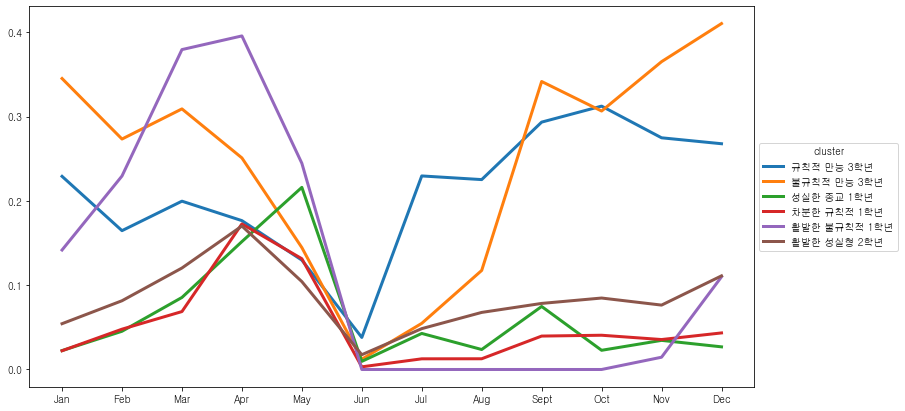

In [98]:
TS_month.T.plot(figsize=(13,7),linewidth=3)
plt.legend(title='cluster',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(len(TS_month.T.index)), TS_month.T.index)

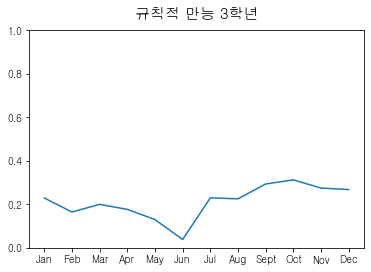

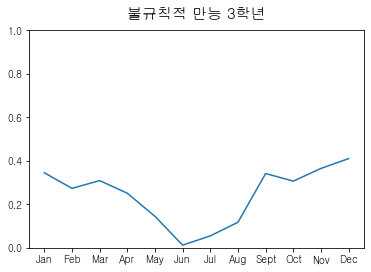

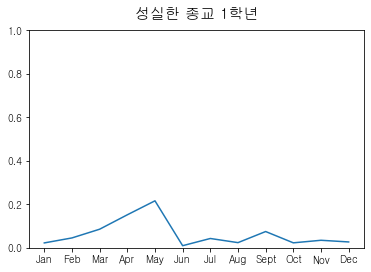

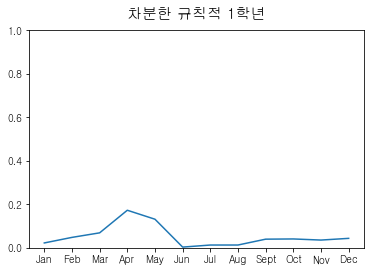

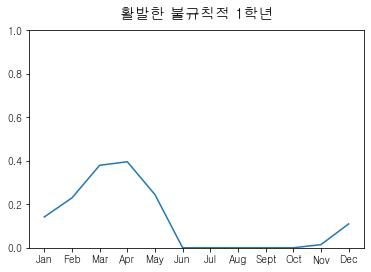

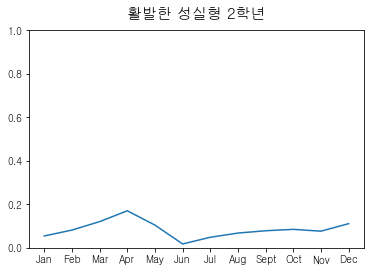

In [100]:
titles=TS_month.index
for i in range(len(titles)):
    title=titles[i]
    val=TS_month.iloc[i,:]
    plt.figure()
    plt.plot(val)
    #plt.fill_between(TS_month.columns,val-TS_month_std.iloc[i,:],val+TS_month_std.iloc[i,:],alpha=.5)
    plt.ylim((0,1))
    plt.title(title,size=15,y=1.03,fontweight="bold")

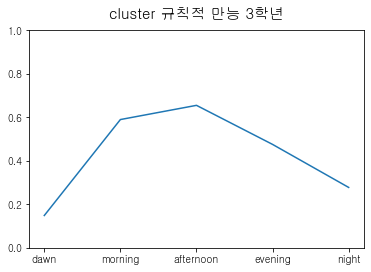

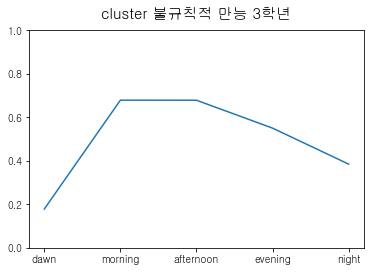

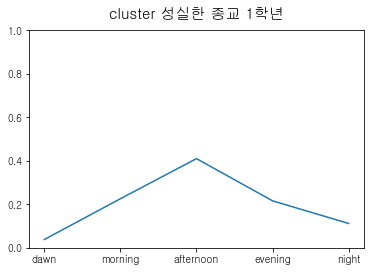

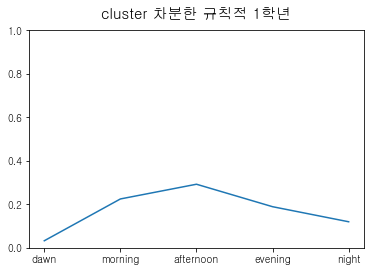

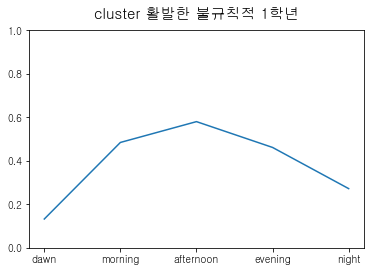

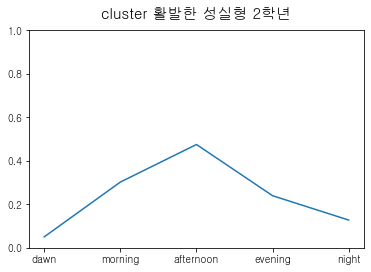

In [101]:
titles=TS_time.index
for i in range(len(titles)):
    title=titles[i]
    val=TS_time.iloc[i,:]
    plt.figure()
    plt.plot(val)
    #plt.fill_between(TS_time.columns,val-TS_time_std.iloc[i,:],val+TS_time_std.iloc[i,:],alpha=.5)
    plt.ylim((0,1))
    plt.title('cluster '+title,size=15,y=1.03,fontweight="bold")

C:\Users\LSH\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


([<matplotlib.axis.XTick at 0x160cef7c130>,
 [Text(0, 0, 'dawn'),
  Text(1, 0, 'morning'),
  Text(2, 0, 'afternoon'),
  Text(3, 0, 'evening'),
  Text(4, 0, 'night')])

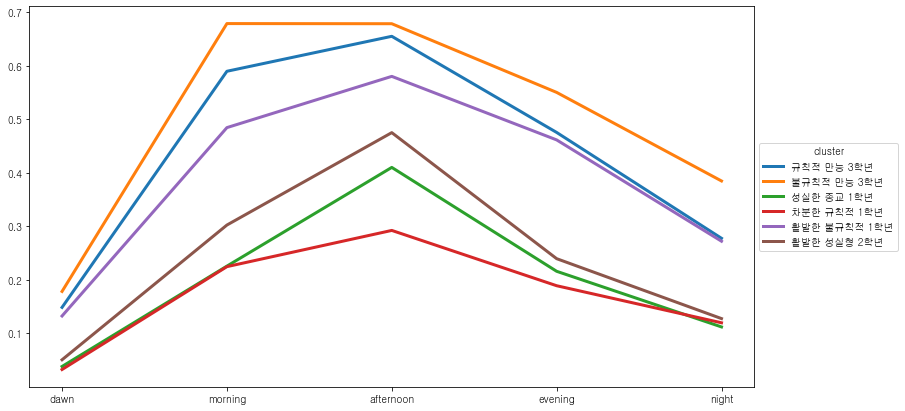

In [102]:
TS_time.T.plot(figsize=(13,7),linewidth=3)
plt.legend(title='cluster',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(len(TS_time.T.index)), TS_time.T.index)

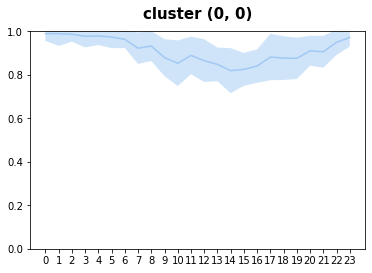

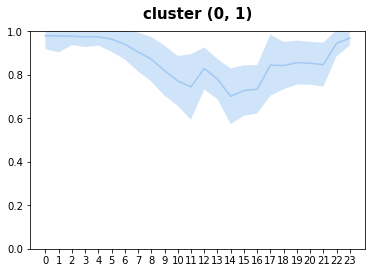

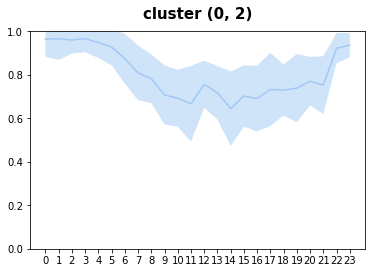

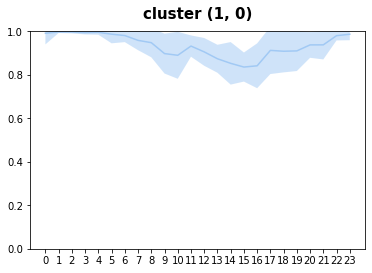

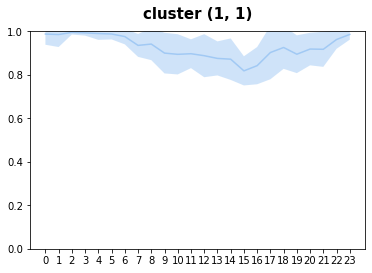

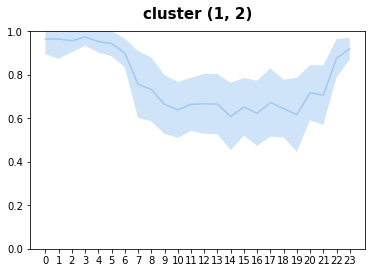

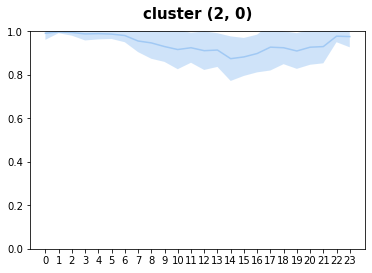

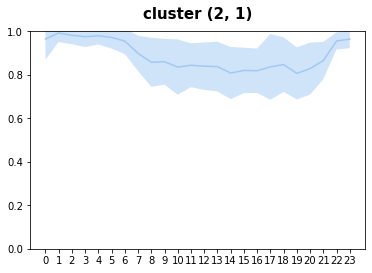

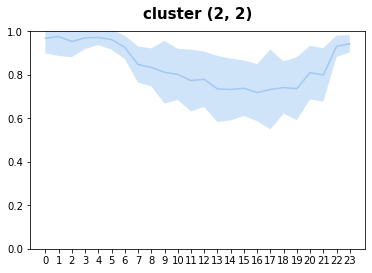

In [253]:
titles=TS_hour.index
for i in range(len(titles)):
    title=titles[i]
    val=TS_hour.iloc[i,:]
    plt.figure()
    plt.plot(val)
    plt.fill_between(TS_hour.columns,val-TS_hour_std.iloc[i,:],val+TS_hour_std.iloc[i,:],alpha=.5)
    plt.ylim((0,1))
    plt.title('cluster '+title,size=15,y=1.03,fontweight="bold")

In [61]:
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
font_path='C:/Windows/Fonts/NGULIM.TTF'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

In [228]:
cluster_mean['emergency_afternoon']

cluster
(0, 0)    1.931373
(0, 1)    3.586466
(0, 2)    6.483791
(1, 0)    1.548148
(1, 1)    1.304000
(1, 2)    8.066964
(2, 0)    1.015306
(2, 1)    3.296774
(2, 2)    4.352564
Name: emergency_afternoon, dtype: float64

<AxesSubplot:ylabel='cluster'>

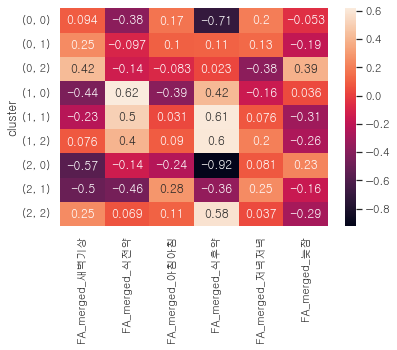

In [62]:
sns.heatmap(cluster_mean[cluster_mean.columns[cluster_mean.columns.str.contains('FA_merged')]], annot=True)#, fmt="d")#, vmin=vmin, vmax=vmax)